<a href="https://colab.research.google.com/github/Muhammadyusuf2580/MachinLarning/blob/main/LogisticRegrtession.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder



In [ ]:
# Fayl yo'li (kagglehub dan yuklangan papkaga qarab o'zgartirish)
import os
import kagglehub
path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")
file_path = os.path.join(path, "student_depression_dataset.csv")



In [ ]:
# 1. CSV ni yuklash
df = pd.read_csv(file_path)



In [ ]:
# 2. Tanlangan ustunlar
feature_cols = [
    'Gender', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
    'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
    'Dietary Habits', 'Work/Study Hours', 'Financial Stress',
    'Family History of Mental Illness'
]



In [ ]:
# 3. NaN qiymatlarni tozalash
df = df[feature_cols + ['Depression']].dropna()



In [ ]:
# 4. LabelEncoding categorical ustunlar
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])



In [ ]:
# 5. X va y ajratish
X = df[feature_cols]
y = df['Depression']



In [ ]:
# 6. Train/Test bo‘lish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# 7. Model yaratish
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [ ]:
# 8. Bashorat va baholash
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.7792510302813116
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.70      0.73      2343
           1       0.80      0.83      0.81      3238

    accuracy                           0.78      5581
   macro avg       0.77      0.77      0.77      5581
weighted avg       0.78      0.78      0.78      5581



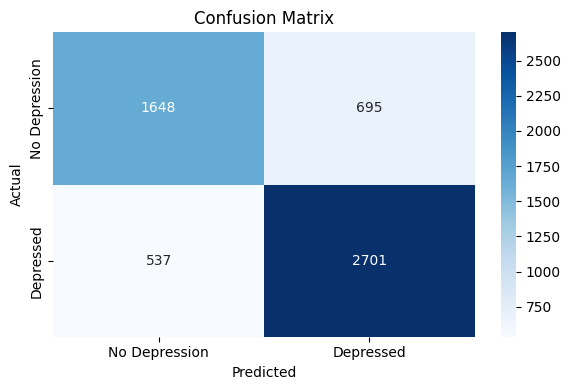

In [ ]:
# 9. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Depression", "Depressed"], yticklabels=["No Depression", "Depressed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()



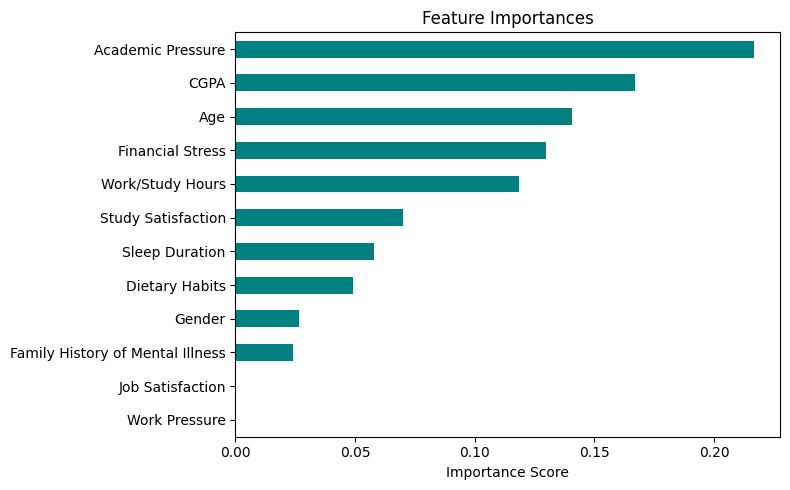

In [ ]:
# 10. Feature Importance
importances = model.feature_importances_
feat_importances = pd.Series(importances, index=feature_cols).sort_values(ascending=True)

plt.figure(figsize=(8, 5))
feat_importances.plot(kind='barh', color='teal')
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()
